In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix and Node-Link

In [21]:
X = []
Y = []

with open("0.edges") as file:
  for line in file:
    l = line.rstrip()
    x, y = [int(num) for num in l.split(' ')]
    X.append(x)
    Y.append(y)

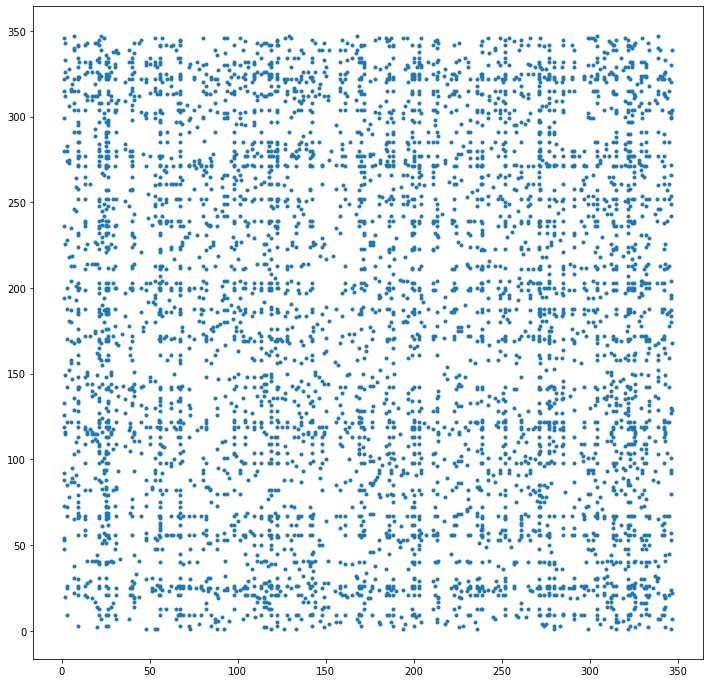

In [22]:
plt.figure(figsize=(12, 12))
plt.scatter(X, Y, marker='.')

In [23]:
# sort on the basis of circle values
priority = []
with open("0.circles") as file:
  i = 0
  for line in file:
    l = line.rstrip()
    _, l = l.split('\t', maxsplit=1)
    priority.extend([[int(num),i] for num in l.split('\t')])
    i += 1

In [24]:
priority.sort(key=lambda x: x[1])

In [26]:
# sort on the basis of circle values
priority = []
with open("0.circles") as file:
  for line in file:
    l = line.rstrip()
    _, l = l.split('\t', maxsplit=1)
    priority.extend([int(num) for num in l.split('\t')])


print(priority)

[71, 215, 54, 61, 298, 229, 81, 253, 193, 97, 264, 29, 132, 110, 163, 259, 183, 334, 245, 222, 173, 155, 99, 327, 140, 116, 147, 144, 150, 270, 51, 83, 237, 125, 344, 295, 257, 55, 122, 223, 59, 268, 280, 84, 156, 258, 236, 250, 239, 69, 23, 337, 289, 93, 17, 111, 52, 137, 343, 192, 35, 326, 310, 214, 32, 115, 321, 209, 312, 41, 20, 225, 46, 282, 336, 204, 74, 206, 292, 146, 154, 164, 279, 73, 42, 14, 216, 2, 324, 265, 54, 161, 298, 76, 165, 199, 203, 13, 66, 113, 97, 252, 313, 238, 158, 240, 331, 332, 134, 218, 118, 235, 311, 151, 308, 212, 70, 211, 278, 138, 131, 68, 143, 86, 175, 227, 108, 208, 251, 125, 325, 176, 133, 276, 198, 271, 288, 316, 96, 246, 347, 121, 7, 3, 170, 323, 56, 338, 23, 109, 141, 67, 345, 55, 114, 122, 50, 304, 318, 65, 15, 45, 317, 322, 26, 31, 168, 124, 285, 255, 129, 40, 172, 274, 95, 207, 128, 339, 233, 1, 294, 280, 224, 269, 256, 60, 328, 189, 146, 77, 196, 64, 286, 89, 22, 39, 190, 281, 117, 38, 213, 135, 197, 291, 21, 315, 261, 47, 36, 186, 169, 342, 49, 

In [27]:
m = {}
i = 0
for num in priority:
  if num not in m:
    m[num] = i
    i += 1

for num in X:
  if num not in m:
    m[num] = i
    i += 1

for num in Y:
  if num not in m:
    m[num] = i
    i += 1

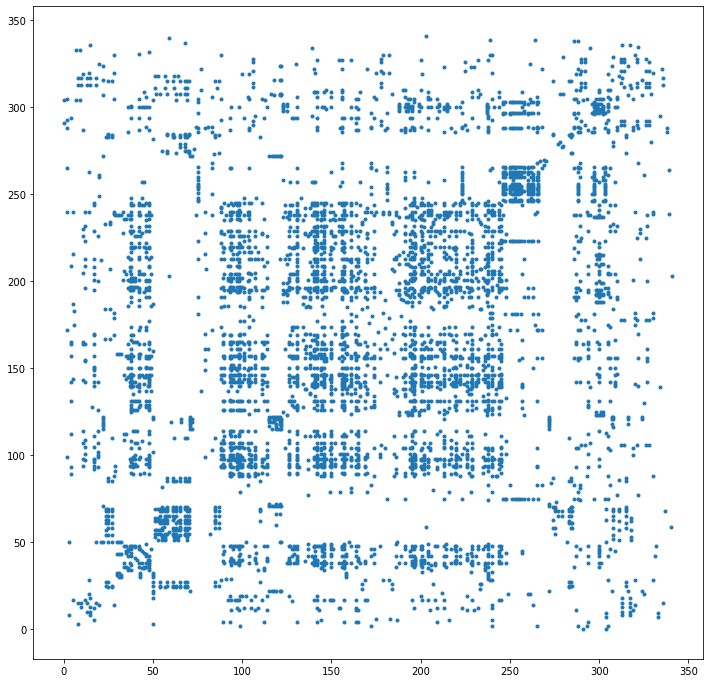

In [29]:
XX = [m[val] for val in X]
YY = [m[val] for val in Y]

plt.figure(figsize=(12, 12))
plt.scatter(XX, YY, marker='.')

In [82]:
import networkx as nx
import matplotlib.pyplot as plt
G_fb = nx.read_edgelist("facebook_combined.txt", create_using= nx.Graph(), nodetype = int)

In [83]:
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


In [86]:
pos = nx.random_layout(G_fb)

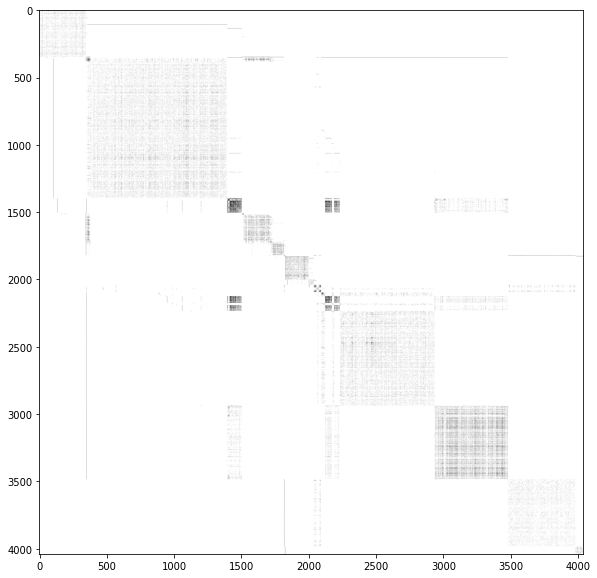

In [87]:
matrix = nx.to_numpy_matrix(G_fb)
plt.imshow(matrix, cmap="binary")
plt.show()

In [56]:
from community import community_louvain
parts = community_louvain.best_partition(G_fb)

In [57]:
values = [parts.get(node) for node in G_fb.nodes()]

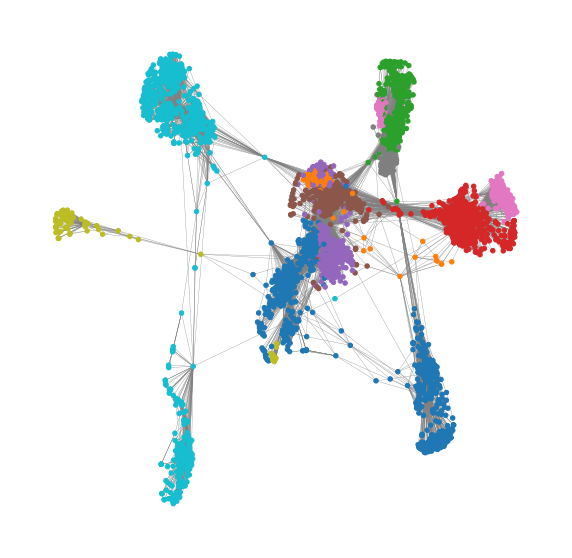

In [58]:
plt.axis("off")
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw_networkx(G_fb, pos = pos, cmap = plt.get_cmap('tab10'), node_color = values, node_size = 20, width = 0.3, edge_color = 'grey', with_labels = False)

# Ego network

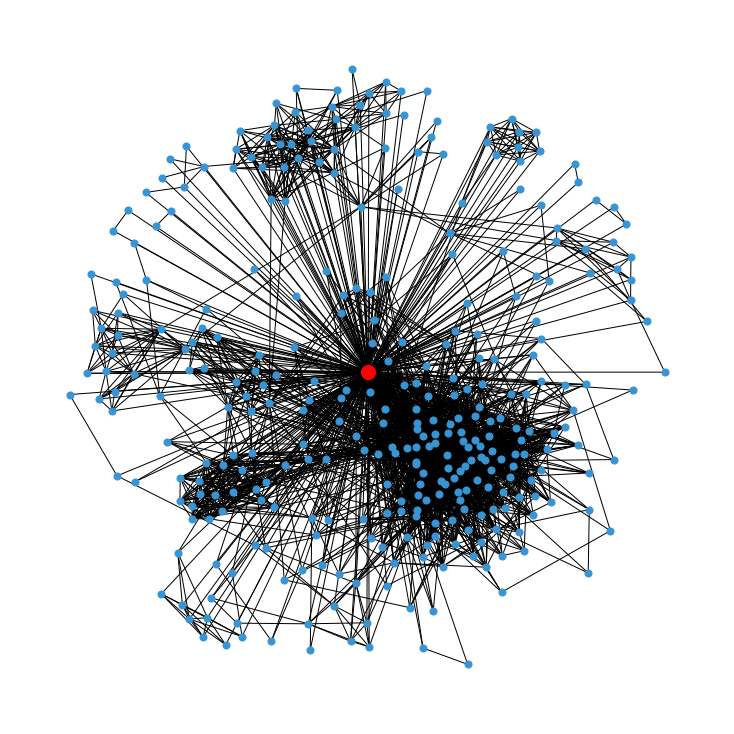

In [101]:
from operator import itemgetter
import matplotlib.pyplot as plt
import networkx as nx

ego = 0
G = nx.Graph()

with open(str(ego) + ".edges") as file:
  for line in file:
    l = line.rstrip()
    x, y = [int(num) for num in l.split(' ')]
    G.add_edge(x, y)
    G.add_edge(ego, x)
    G.add_edge(ego, y)

# find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego)  # Seed layout for reproducibility
nx.draw(hub_ego, pos, node_color="#3895D3", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 200, "node_color": "red"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

In [74]:
ego = 0
G = nx.Graph()

with open(str(ego) + ".edges") as file:
  for line in file:
    l = line.rstrip()
    x, y = [int(num) for num in l.split(' ')]
    G.add_edge(x, y)
    G.add_edge(ego, x)
    G.add_edge(ego, y)
    G.add_edge(x, ego)
    G.add_edge(y, ego)

pos = nx.spring_layout(G)  

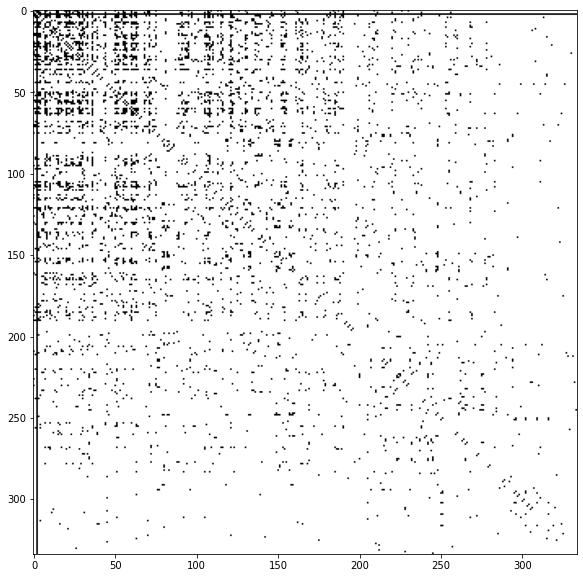

In [75]:
matrix = nx.to_numpy_matrix(G)
plt.imshow(matrix, cmap="binary")
plt.show()